In [25]:
import numpy
import pandas as pd
import numpy as np
from pgmpy.estimators import BdeuScore, K2Score, BicScore
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

In [26]:
def features(data):
       
    data.loc[data.HEAP == 0.0, 'HEAP'] = 0
    data.loc[data.HEAP != 0.0, 'HEAP'] = 1
    
    data.loc[data.WIC == 0.0 ,'WIC'] = 0
    data.loc[data.WIC != 0.0 ,'WIC'] = 1
    
    data.loc[data.SchoolLunch == 0.0, 'SchoolLunch'] = 0
    data.loc[data.SchoolLunch != 0.0, 'SchoolLunch'] = 1

    data.loc[data.MOOP == 0.0, 'MOOP'] = 0
    data.loc[data.MOOP != 0.0, 'MOOP'] = 1

    data.loc[data.Childcare == 0.0, 'Childcare'] = 0
    data.loc[data.Childcare != 0.0, 'Childcare'] = 1

    data.loc[data.FoodStamps == 0.0, 'FoodStamps'] = 0
    data.loc[data.FoodStamps != 0.0, 'FoodStamps'] = 1

    data.loc[data.Commuting == 0.0, 'Commuting'] = 0
    data.loc[data.Commuting != 0.0, 'Commuting'] = 1

    data.loc[data.Housing == 0.0, 'Housing'] = 0
    data.loc[data.Housing != 0.0, 'Housing'] = 1
    
    data = data.loc[:, [u'PovunitType', u'WorkExpIndiv',
                  u'HEAP', u'CitizenStatus',
                  u'EducAttain',
                  u'WIC', u'HousingStatus',
                  u'WorkersEquiv', u'SchoolLunch',
                  u'MOOP', u'MV', u'Childcare', 
                  u'FoodStamps', u'Commuting',
                  u'Housing', 'Pov_risk']]
    return data

In [27]:
def features_all(data):
       
    data.loc[data.HEAP == 0.0, 'HEAP'] = 0
    data.loc[data.HEAP != 0.0, 'HEAP'] = 1
    
    data.loc[data.WIC == 0.0 ,'WIC'] = 0
    data.loc[data.WIC != 0.0 ,'WIC'] = 1
    
    data.loc[data.SchoolLunch == 0.0, 'SchoolLunch'] = 0
    data.loc[data.SchoolLunch != 0.0, 'SchoolLunch'] = 1

    data.loc[data.MOOP == 0.0, 'MOOP'] = 0
    data.loc[data.MOOP != 0.0, 'MOOP'] = 1

    data.loc[data.Childcare == 0.0, 'Childcare'] = 0
    data.loc[data.Childcare != 0.0, 'Childcare'] = 1

    data.loc[data.FoodStamps == 0.0, 'FoodStamps'] = 0
    data.loc[data.FoodStamps != 0.0, 'FoodStamps'] = 1

    data.loc[data.Commuting == 0.0, 'Commuting'] = 0
    data.loc[data.Commuting != 0.0, 'Commuting'] = 1

    data.loc[data.Housing == 0.0, 'Housing'] = 0
    data.loc[data.Housing != 0.0, 'Housing'] = 1
    
    data = data.loc[:, [ u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP', u'EducAttain',
      u'FoodStamps', u'year', u'Pov_risk']]
    return data

In [ ]:
# thresholds = pd.Series(puma_05.CEO_Threshold.unique())

In [ ]:
# thresholds.hist(bins=35)
# plt.vlines(x=thresholds.median(), ymin=0, ymax=18, color = 'red')
# plt.vlines(x=thresholds.mean(), ymin=0, ymax=18, color = 'yellow')

In [ ]:
# puma_05[puma_05.CEO_Threshold == puma_05.CEO_Threshold.max()]

In [ ]:
# thresholds.describe()

In [ ]:
# thresholds.quantile(0.99)

In [ ]:
# thresholds_of = pd.Series(puma_05.Official_Threshold.unique())

In [ ]:
# thresholds_of.hist(bins=30)

# New check without aggregation

In [ ]:
# puma_05.CEO_Income.describe()

In [ ]:
# puma_05[puma_05.CEO_Income < 0]['PUMA'].hist()

In [ ]:
# puma_05[puma_05.SERIALNO == 812]

In [ ]:
# puma_05[puma_05.CEO_Income == 0]

In [ ]:
# puma_05.CEO_Income.quantile(0.1)

In [ ]:
# df[(df.CEO_Poverty == 1)&(df.CEO_Threshold < df.CEO_Income)][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

In [ ]:
# df[(df.Pov_risk == 1)&((df.CEO_Poverty == 1))][['CEO_Threshold', 'CEO_Income','CEO_Poverty', 'Pov_risk', 'Threshold1']]

In [ ]:
# X = df[[ u'PovunitType', u'WorkExpIndiv', u'Povunit',
#         u'SchoolBreakfast', u'HEAP', u'CitizenStatus',
#         u'AgeCateg_2', u'AgeCateg_3', u'EducAttain',
#         u'WIC', u'HousingStatus',
#        u'WorkersEquiv', u'SchoolLunch', u'AgeCateg_1',
#        u'MOOP', u'MV', u'Childcare', 
#        u'NP', u'FoodStamps', u'Commuting',
#        u'Housing', 'Pov_risk']]

In [ ]:
# X.columns

# Making continuous variables discrete

In [ ]:
# print X.SchoolBreakfast.value_counts()
# X.SchoolBreakfast.hist()

In [ ]:
# print (X.HEAP).value_counts()
# X.HEAP.hist(bins= 50)

In [ ]:
# X.HEAP[X.HEAP == 0.0] = 0
# X.HEAP[X.HEAP != 0.0] = 1

In [ ]:
# X.HEAP.value_counts()

In [ ]:
# print X.WIC.value_counts()
# X.WIC.hist(bins=50)

In [ ]:
# X.WIC[X.WIC == 0.0] = 0
# X.WIC[X.WIC != 0.0] = 1

In [ ]:
# X.WIC.value_counts()

In [ ]:
# print X.SchoolLunch.value_counts()
# X.SchoolLunch.hist(bins = 100)

In [ ]:
# X.SchoolLunch[X.SchoolLunch == 0.0] = 0
# X.SchoolLunch[X.SchoolLunch != 0.0] = 1

In [ ]:
# X.SchoolLunch.value_counts()

In [ ]:
# print X.MOOP.describe()
# (X.MOOP).hist(bins = 100)

In [ ]:
# X.MOOP[X.MOOP == 0.0] = 0
# X.MOOP[X.MOOP != 0.0] = 1

In [ ]:
# X.MOOP.plot.box()

In [ ]:
# print X.Childcare.value_counts()
# X.Childcare.hist(log = True, bins=100)

In [ ]:
# X.Childcare[X.Childcare == 0.0] = 0
# X.Childcare[X.Childcare != 0.0] = 1

In [ ]:
# print X.FoodStamps.value_counts()
# X.FoodStamps.hist(bins=100, log = True)

In [ ]:
# np.sqrt(X.FoodStamps).hist(bins=100, log = True)

In [ ]:
# X.FoodStamps[X.FoodStamps == 0.0] = 0
# X.FoodStamps[X.FoodStamps != 0.0] = 1

In [ ]:
# X.FoodStamps.value_counts()

In [ ]:
# print X.Commuting.value_counts()
# X.Commuting.hist(log = True, bins=100)

In [ ]:
# X[(((X.Commuting - X.Commuting.mean()) / X.Commuting.std()) < 0) &
#   (((X.Commuting - X.Commuting.mean()) / X.Commuting.std()) >= -1)].Pov_risk.value_counts()

In [ ]:
# np.sqrt(X.Commuting).hist(bins= 100)

In [ ]:
# X[(np.sqrt(X.Commuting) < 10)].Pov_risk.value_counts()

In [ ]:
# X.Commuting[X.Commuting == 0.0] = 0
# X.Commuting[X.Commuting != 0.0] = 1

In [ ]:
# X.Housing.unique()
# X.Housing.hist()

In [ ]:
# X.Housing[X.Housing == 0.0] = 0
# X.Housing[X.Housing != 0.0] = 1

In [ ]:
G = nx.DiGraph()
G.add_edges_from(best_model.edges())
nx.draw(G, with_labels=True, arrows=True, node_size=700)

In [28]:
puma_all = pd.read_csv("../Data/Cleaned/puma_all.csv")

In [29]:
puma_all.drop(['Unnamed: 0'], axis=1, inplace=True)

In [30]:
puma_all.columns

Index([u'SERIALNO', u'Official_Poverty', u'CEO_Income', u'FICAtax',
       u'PovunitType', u'WorkExpIndiv', u'Povunit', u'IncomeTax',
       u'SchoolBreakfast', u'HEAP', u'CitizenStatus', u'Official_Threshold',
       u'AgeCateg_2', u'AgeCateg_3', u'CEO_Poverty', u'PUMA', u'WIC',
       u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'CEO_Threshold',
       u'AgeCateg_1', u'Boro', u'MOOP', u'MV', u'Childcare', u'EducAttain',
       u'NP', u'FoodStamps', u'PreTaxIncome', u'Commuting', u'Housing',
       u'Ethnicity', u'Threshold1', u'year', u'unique_key', u'Pov_risk'],
      dtype='object')

In [31]:
X = features_all(puma_all)

In [32]:
X.columns

Index([u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps', u'year', u'Pov_risk'],
      dtype='object')

In [33]:
X.year.replace({2005:0, 2006:1,2007:2, 2008:3,2009:4, 2010:5,2011:6, 2012:7,2013:8, 2014:9}, inplace=True)
X.HousingStatus.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6, 8:7,9:8}, inplace=True)
X.WorkersEquiv.replace({1:0, 2:1,3:2, 4:3,5:4}, inplace=True)
X.EducAttain.replace({1:0, 2:1,3:2, 4:3}, inplace=True)

In [99]:
# train_all,test_all=train_test_split(X,random_state=,test_size=0.20)
hc_all = HillClimbSearch(X, scoring_method=BicScore(X))
best_model_all = hc_all.estimate()

In [100]:
best_model_all.edges()

[(u'Pov_risk', u'HousingStatus'),
 (u'Pov_risk', u'MOOP'),
 (u'Pov_risk', u'SchoolLunch'),
 (u'Pov_risk', u'HEAP'),
 (u'Pov_risk', u'FoodStamps'),
 (u'Pov_risk', u'EducAttain'),
 (u'WorkersEquiv', u'SchoolLunch'),
 (u'WorkersEquiv', u'FoodStamps'),
 (u'WorkersEquiv', u'Pov_risk'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'WorkersEquiv', u'HousingStatus'),
 (u'SchoolLunch', u'HousingStatus'),
 (u'HEAP', u'SchoolLunch'),
 (u'HEAP', u'HousingStatus'),
 (u'year', u'MOOP'),
 (u'year', u'HEAP'),
 (u'FoodStamps', u'MOOP'),
 (u'FoodStamps', u'SchoolLunch'),
 (u'FoodStamps', u'HEAP'),
 (u'FoodStamps', u'year'),
 (u'EducAttain', u'FoodStamps'),
 (u'EducAttain', u'year')]

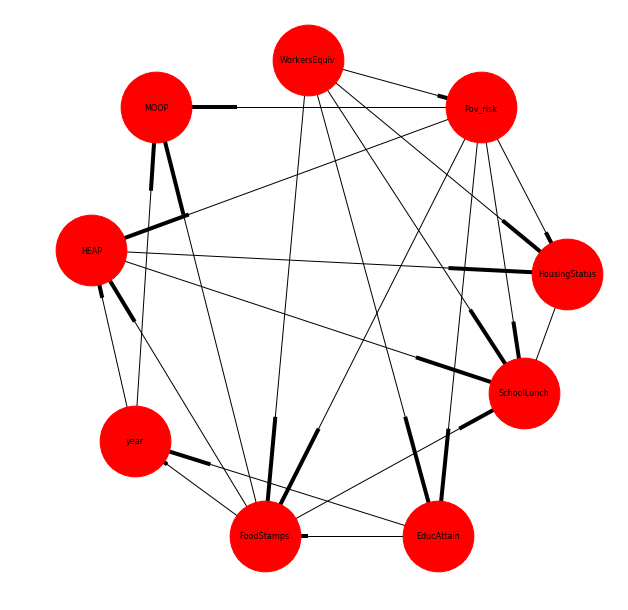

In [101]:
fig = plt.figure(figsize=(8,8))
# ax = fig.add_
G = nx.DiGraph()
G.add_edges_from(best_model_all.edges())
pos = {u'HEAP':(-100,20), u'HousingStatus':(120,10), u'WorkersEquiv':(0, 100) , u'SchoolLunch':(100,-40), u'MOOP':(-70,80),
       u'EducAttain':(60,-100), u'FoodStamps':(-20,-100), u'year':(-80,-60), u'Pov_risk':(80,80)}
nx.draw(G, pos=pos, with_labels=True,  arrows=True, font_size = 8, node_size=5000)

In [103]:
est = BayesianEstimator(best_model_all, X)
print est.estimate_cpd('Pov_risk', prior_type='BDeu', equivalent_sample_size=1000)

+---------------+-----------------+-----------------+-----------------+-----------------+-----------------+
| WorkersEquiv  | WorkersEquiv(0) | WorkersEquiv(1) | WorkersEquiv(2) | WorkersEquiv(3) | WorkersEquiv(4) |
+---------------+-----------------+-----------------+-----------------+-----------------+-----------------+
| Pov_risk(0.0) | 0.0391342132421 | 0.0952445492577 | 0.111580878585  | 0.355201618     | 0.410812173837  |
+---------------+-----------------+-----------------+-----------------+-----------------+-----------------+
| Pov_risk(1.0) | 0.118684482103  | 0.175372493743  | 0.213573375971  | 0.249428740896  | 0.263002675087  |
+---------------+-----------------+-----------------+-----------------+-----------------+-----------------+
| Pov_risk(2.0) | 0.842181304655  | 0.729382956999  | 0.674845745444  | 0.395369641103  | 0.326185151077  |
+---------------+-----------------+-----------------+-----------------+-----------------+-----------------+


best_model_all.fit(train_all, estimator=BayesianEstimator, prior_type='BDeu', equivalent_sample_size=100)

test_all = test_all.astype(int)
test_all.reset_index(inplace=True, drop=True)

In [38]:
y_pred = best_model_all.predict(test_all.loc[:,[u'HEAP', u'HousingStatus', u'WorkersEquiv', u'SchoolLunch', u'MOOP',
       u'EducAttain', u'FoodStamps', u'year']])

IndexError: list index out of range

In [104]:
puma_all.shape

(257394, 37)

In [ ]:
[(u'WorkersEquiv', u'Pov_risk' ),
 ( u'FoodStamps', u'Pov_risk'),
 ( u'SchoolLunch', u'Pov_risk'),
 ( u'EducAttain', u'Pov_risk'),
 ( u'MOOP', u'Pov_risk'),
 (u'HousingStatus', u'WorkersEquiv'),
 (u'HousingStatus', u'FoodStamps'),
 (u'HousingStatus', u'Pov_risk'),
 (u'HousingStatus', u'HEAP'),
 (u'WorkersEquiv', u'SchoolLunch'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'Housing', u'Pov_risk'),
 (u'Housing', u'HousingStatus'),
 (u'Housing', u'MOOP'),
 (u'Housing', u'SchoolLunch'),
 (u'Housing', u'FoodStamps'),
 (u'Housing', u'EducAttain'),
 (u'HEAP', u'SchoolLunch'),
 (u'year', u'MOOP'),
 (u'year', u'HEAP'),
 (u'year',u'EducAttain')]

In [93]:
def feat_new(data):
    data = data.loc[:, [u'PovunitType',
                   u'CitizenStatus',
                  u'EducAttain',
                  u'HousingStatus',
                  u'AgeCateg_2',       
                  u'WorkersEquiv', u'MV', 
                   'Pov_risk']]
    
    data.PovunitType.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6, 8:7}, inplace=True)
    data.MV.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6}, inplace=True)
    data.HousingStatus.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6, 8:7,9:8}, inplace=True)
    data.WorkersEquiv.replace({1:0, 2:1,3:2, 4:3,5:4}, inplace=True)
    data.EducAttain.replace({1:0, 2:1,3:2, 4:3}, inplace=True)
    data.CitizenStatus.replace({1:0, 2:1,3:2}, inplace=True)
    return data

In [94]:
Xnew = feat_new(puma_all)
Xnew.AgeCateg_2.replace({1:0, 2:1,3:2, 4:3,5:4, 6:5,7:6, 8:7,9:8,10:9,11:10,12:11,13:12,14:13,15:14}, inplace=True) 

In [95]:
# train_all_new,test_all_new=train_test_split(Xnew,random_state=545,test_size=0.20)
hc_all_new = HillClimbSearch(Xnew, scoring_method=BicScore(Xnew))
best_model_all_new = hc_all_new.estimate()

In [96]:
best_model_all_new.edges()

[('Pov_risk', u'PovunitType'),
 ('Pov_risk', u'CitizenStatus'),
 ('Pov_risk', u'HousingStatus'),
 ('Pov_risk', u'EducAttain'),
 (u'HousingStatus', u'PovunitType'),
 (u'HousingStatus', u'MV'),
 (u'PovunitType', u'CitizenStatus'),
 (u'PovunitType', u'EducAttain'),
 (u'PovunitType', u'AgeCateg_2'),
 (u'WorkersEquiv', 'Pov_risk'),
 (u'WorkersEquiv', u'HousingStatus'),
 (u'WorkersEquiv', u'PovunitType'),
 (u'WorkersEquiv', u'MV'),
 (u'WorkersEquiv', u'EducAttain'),
 (u'WorkersEquiv', u'AgeCateg_2'),
 (u'MV', u'CitizenStatus')]

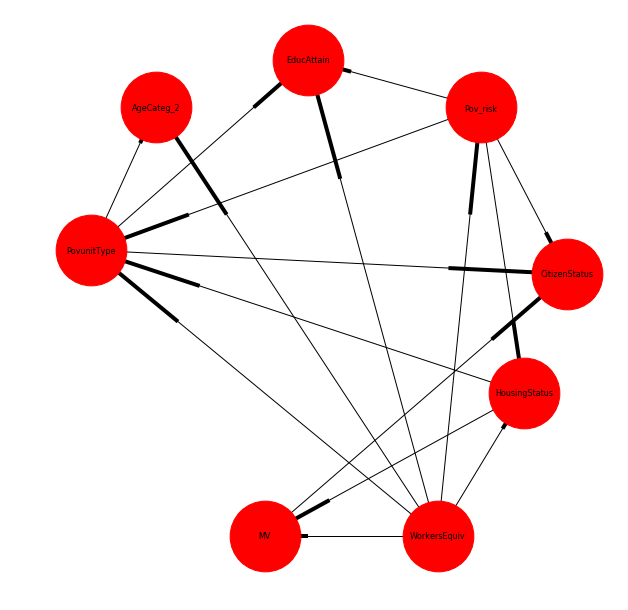

In [98]:
fig = plt.figure(figsize=(8,8))
# ax = fig.add_
G = nx.DiGraph()
G.add_edges_from(best_model_all_new.edges())
pos = {u'PovunitType':(-100,20), u'CitizenStatus':(120,10), u'EducAttain':(0, 100) , u'HousingStatus':(100,-40), u'AgeCateg_2':(-70,80),
       u'WorkersEquiv':(60,-100), u'MV':(-20,-100), u'Pov_risk':(80,80)}
nx.draw(G, pos=pos, with_labels=True,  arrows=True, font_size = 8, node_size=5000)